In [1]:
import pandas as pd

In [5]:

import zipfile

zip_path = "/content/recipe.zip"
extract_path = "/content/Data"  # folder to extract into

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [6]:
df = pd.read_json("/content/Data/train.json")

In [7]:
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


Web scrapping


In [8]:
import requests
from bs4 import BeautifulSoup

In [9]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage = requests.get('https://www.magicbricks.com/flats-in-mumbai-for-sale-pppfs',headers=headers).text

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Flats for Sale in Mumbai: 51595+ Apartments / Flats in Mumbai
  </title>
  <link href="https://fonts.gstatic.com" rel="dns-prefetch"/>
  <link href="https://cdn.staticmb.com" rel="preconnect"/>
  <link href="https://img.staticmb.com" rel="preconnect"/>
  <link href="https://www.googletagmanager.com" rel="dns-prefetch"/>
  <link href="https://www.google-analytics.com" rel="dns-prefetch"/>
  <link href="https://cdn.staticmb.com/images/favicon.ico" rel="shortcut icon"/>
  <meta content="Find over 51595+ Flats in Mumbai for Sale on MagicBricks. Choose from 3020+ New Projects, 27538+ Resale Flats, 33364+ Ready To Move Flats, with the option of 1/2/3/4 BHK apartments in Mumbai. " name="description"/>
  <link as="image" fetchpriority="high" href="https://img.staticmb.com/mbimages/project
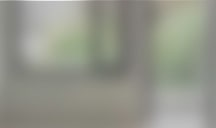
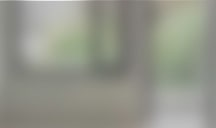

In [10]:
soup = BeautifulSoup(webpage,'lxml')
print(soup.prettify())

In [11]:
soup.find_all('h2')[0].text

'1 BHK Flat  for Sale in  Naigaon East, Mumbai'

In [12]:
for i in soup.find_all('h2'):
  print(i.text)

1 BHK Flat  for Sale in  Naigaon East, Mumbai
1 BHK Flat  for Sale in  Virar, Mumbai
1 BHK Flat  for Sale in  Virar, Mumbai
2 BHK Flat  for Sale in  Mira Road Area, Mumbai
1 BHK Flat  for Sale in  Malad West, Mumbai
1 BHK Flat  for Sale in  Mira Road Area, Mumbai
4 BHK Flat  for Sale in  Bandra Kurla Complex, Mumbai
3 BHK Flat  for Sale in  Mira Road Area, Mumbai
3 BHK Flat  for Sale in  Andheri East, Mumbai
2 BHK Flat  for Sale in  Mulund West, Mumbai
2 BHK Flat  for Sale in  Mulund West, Mumbai
3 BHK Flat  for Sale in  Lal Bahadur Shastri Road, Mumbai
2 BHK Flat  for Sale in  Mulund West, Mumbai
5 BHK Flat  for Sale in  Worli, Mumbai
2 BHK Flat  for Sale in  Malad West, Mumbai
1 BHK Flat  for Sale in  Malad West, Mumbai
2 BHK Flat  for Sale in  Kandivali West, Mumbai
1 BHK Flat  for Sale in  Gilbert Hill, Mumbai
1 BHK Flat  for Sale in  Powai, Mumbai
2 BHK Flat  for Sale in  Andheri East, Mumbai
1 BHK Flat  for Sale in  Kandivali East, Mumbai
3 BHK Flat  for Sale in  Borivali West, M

In [13]:
print("rupees" in soup.text)


False


In [14]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage = requests.get('https://www.ambitionbox.com/list-of-companies?page=1',headers=headers).text

KeyboardInterrupt: 

understanding data


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [16]:
df.isnull().sum()

,0
id,0
cuisine,0
ingredients,0


In [17]:
hashable_df = df.select_dtypes(exclude="object")

df.duplicated(subset=hashable_df.columns).sum()


np.int64(0)

In [18]:
hashable_df.corr()

,id
id,1.0


In [20]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Pclass', ylabel='count'>

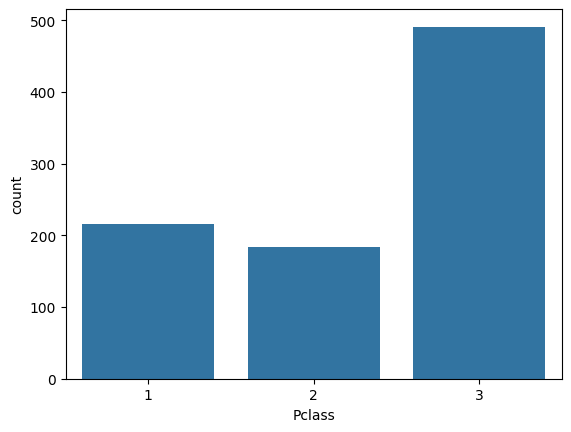

In [23]:
sns.countplot(x="Pclass",data=df)

<Axes: xlabel='Survived'>

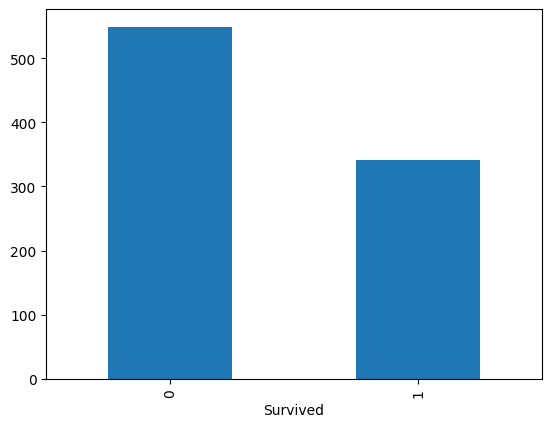

In [24]:
 df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

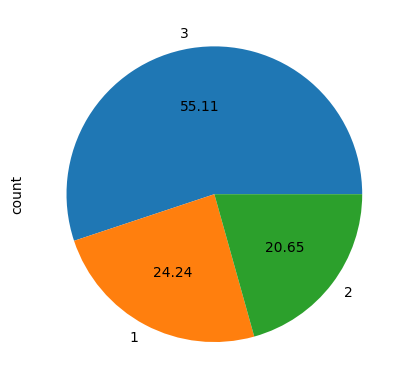

In [25]:
df['Pclass'].value_counts().plot(kind='pie', autopct = '%.2f')

(array([ 44.,  24.,  32., 104., 115., 127.,  80.,  59.,  49.,  30.,  22.,
         17.,   4.,   6.,   1.]),
 array([ 0.42      ,  5.72533333, 11.03066667, 16.336     , 21.64133333,
        26.94666667, 32.252     , 37.55733333, 42.86266667, 48.168     ,
        53.47333333, 58.77866667, 64.084     , 69.38933333, 74.69466667,
        80.        ]),
 <BarContainer object of 15 artists>)

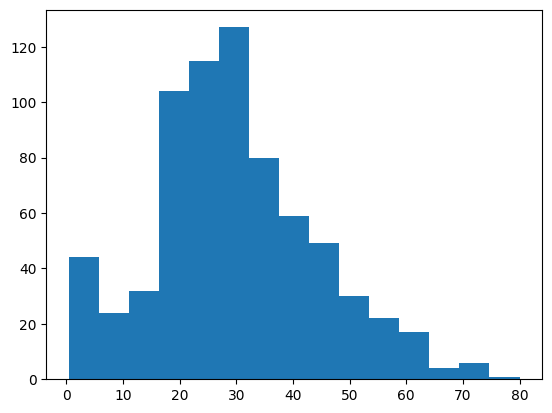

In [26]:
plt.hist(df['Age'],bins=15)

/tmp/ipython-input-1535856312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

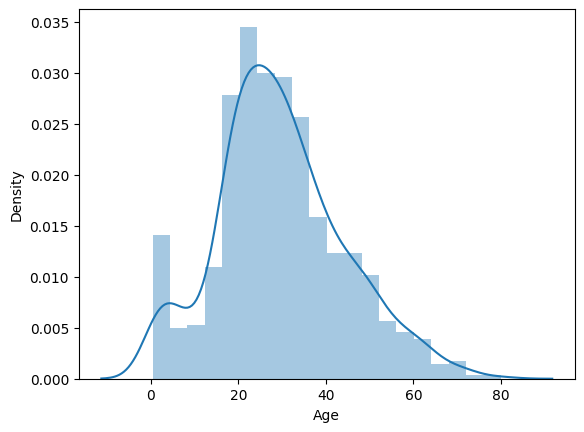

In [27]:

sns.distplot(df['Age'])

<Axes: xlabel='Age'>

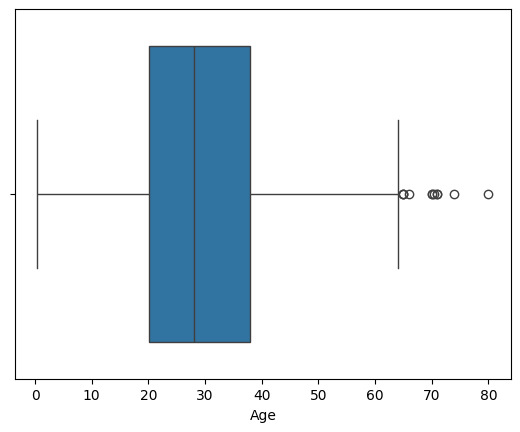

In [28]:
sns.boxplot(x=df['Age'])

In [29]:
df['Fare'].skew()

np.float64(4.787316519674893)

In [31]:
tips = sns.load_dataset('tips')
iris = pd.read_csv('/content/Iris.csv')

In [32]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
41,17.46,2.54,Male,No,Sun,Dinner,2
214,28.17,6.50,Female,Yes,Sat,Dinner,3
71,17.07,3.00,Female,No,Sat,Dinner,3
19,20.65,3.35,Male,No,Sat,Dinner,3


<Axes: xlabel='total_bill', ylabel='tip'>

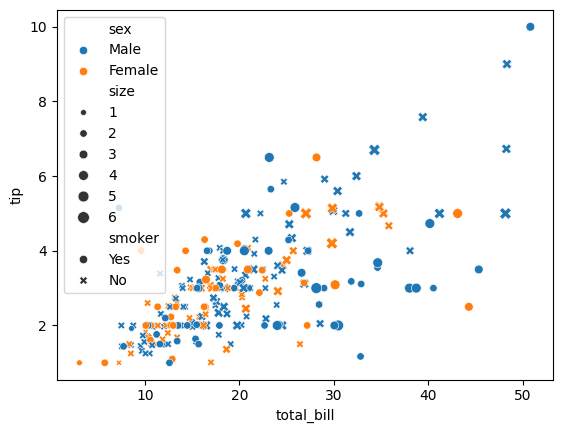

In [37]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],size=tips['size'],style=tips['smoker'])

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Fare'>

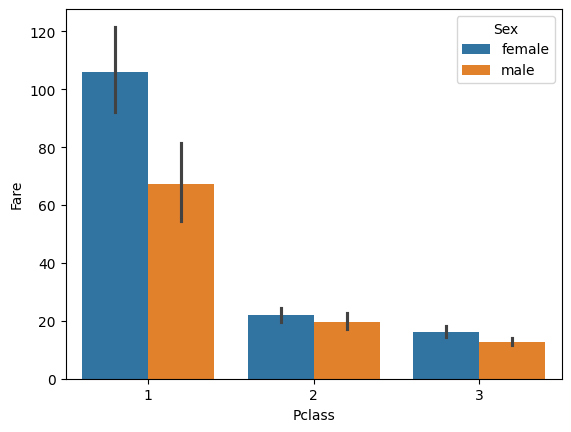

In [39]:
sns.barplot(x=df['Pclass'], y= df['Fare'], hue=df['Sex'])

<Axes: xlabel='Age', ylabel='Sex'>

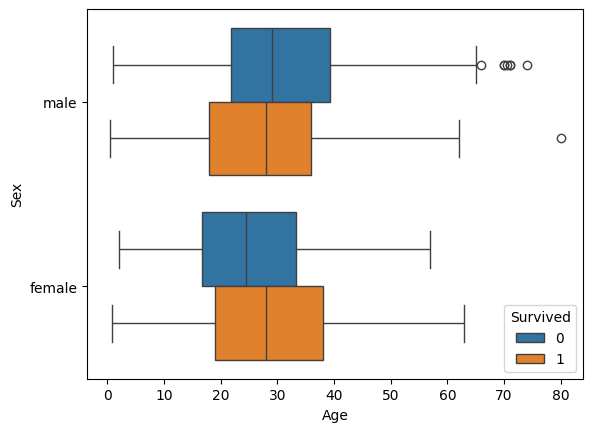

In [40]:
sns.boxplot(y = df['Sex'], x= df['Age'],hue=df['Survived'])

/tmp/ipython-input-3674334801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['Survived']==0 )& (df['Sex']=='male')]['Age'],hist=False)
/tmp/ipython-input-3674334801.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['Survived']==0 )& (df['Sex']=='female')]['

<Axes: xlabel='Age', ylabel='Density'>

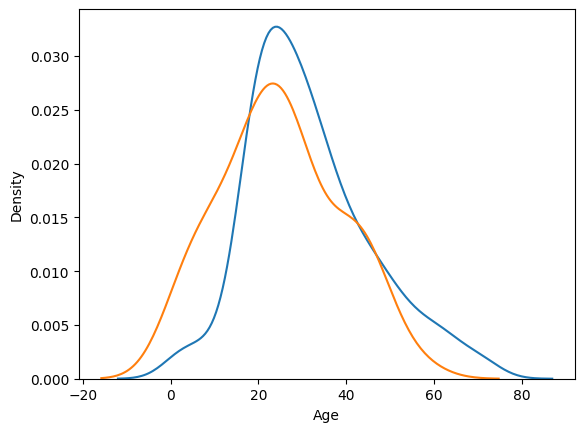

In [41]:
sns.distplot(df[(df['Survived']==0 )& (df['Sex']=='male')]['Age'],hist=False)
sns.distplot(df[(df['Survived']==0 )& (df['Sex']=='female')]['Age'],hist=False)

<Axes: xlabel='Survived', ylabel='Pclass'>

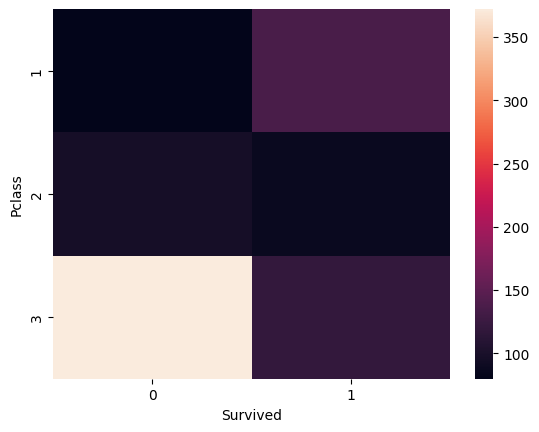

In [42]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']))

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass'>

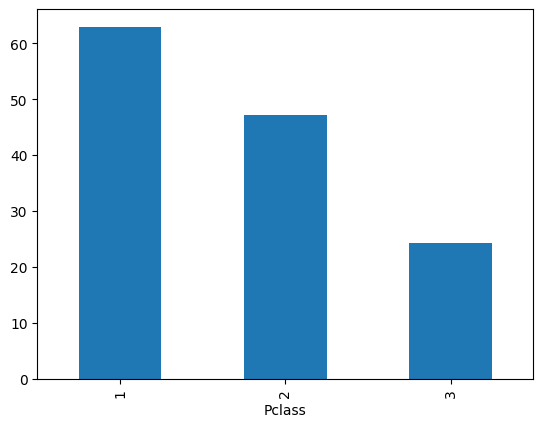

In [44]:
(df.groupby('Pclass')['Survived'].mean()*100).plot(kind='bar')

In [45]:
df.groupby('Pclass')['Survived'].mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [46]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


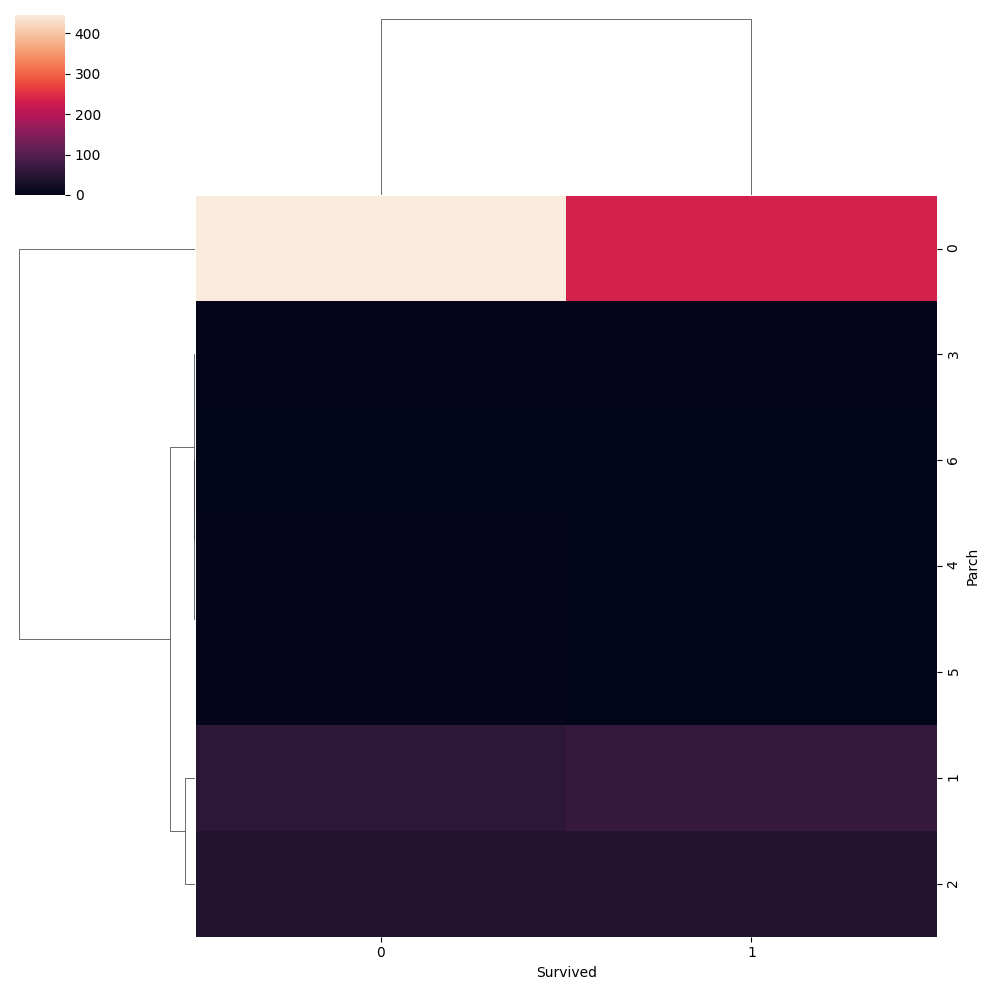

In [50]:
sns.clustermap(pd.crosstab(df['Parch'],df['Survived']))

In [53]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


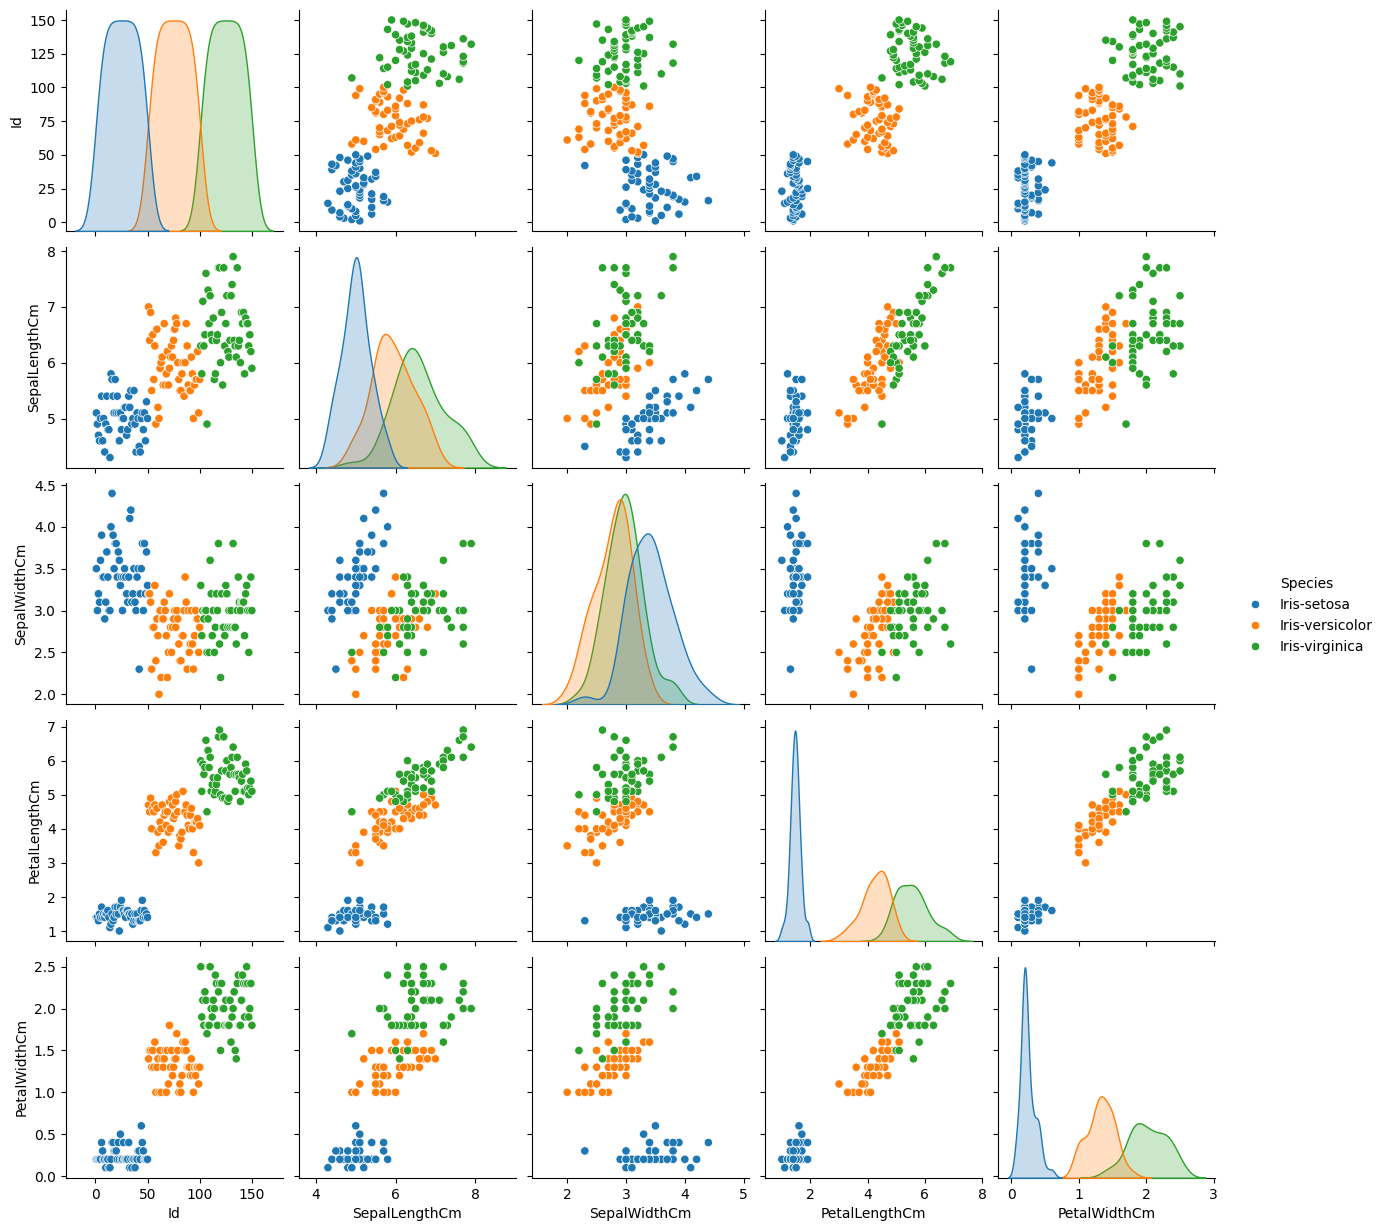

In [54]:
sns.pairplot(iris,hue='Species')

In [60]:
flights.head(-5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
134,1960,Mar,419
135,1960,Apr,461
136,1960,May,472
137,1960,Jun,535


In [63]:
dfn = flights.groupby('year')['passengers'].sum().reset_index()

<Axes: xlabel='year', ylabel='passengers'>

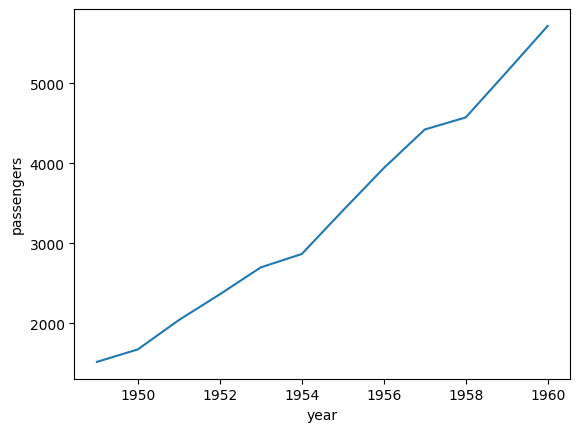

In [64]:
sns.lineplot(x=dfn['year'],y=dfn['passengers'])

/tmp/ipython-input-1314982076.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values='passengers', index='month', columns='year'))


<Axes: xlabel='year', ylabel='month'>

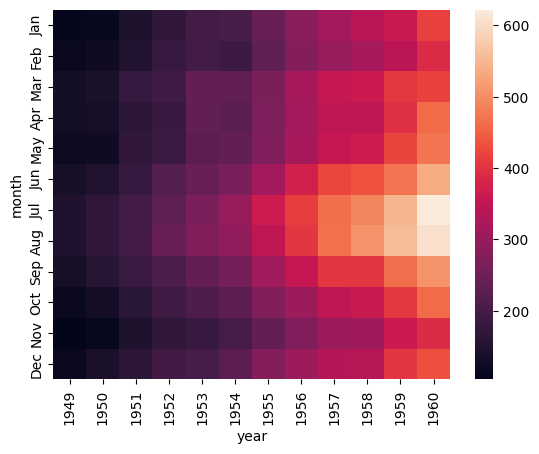

In [66]:
sns.heatmap(flights.pivot_table(values='passengers', index='month', columns='year'))

/tmp/ipython-input-4080272704.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.clustermap(flights.pivot_table(values='passengers', index='month', columns='year'))


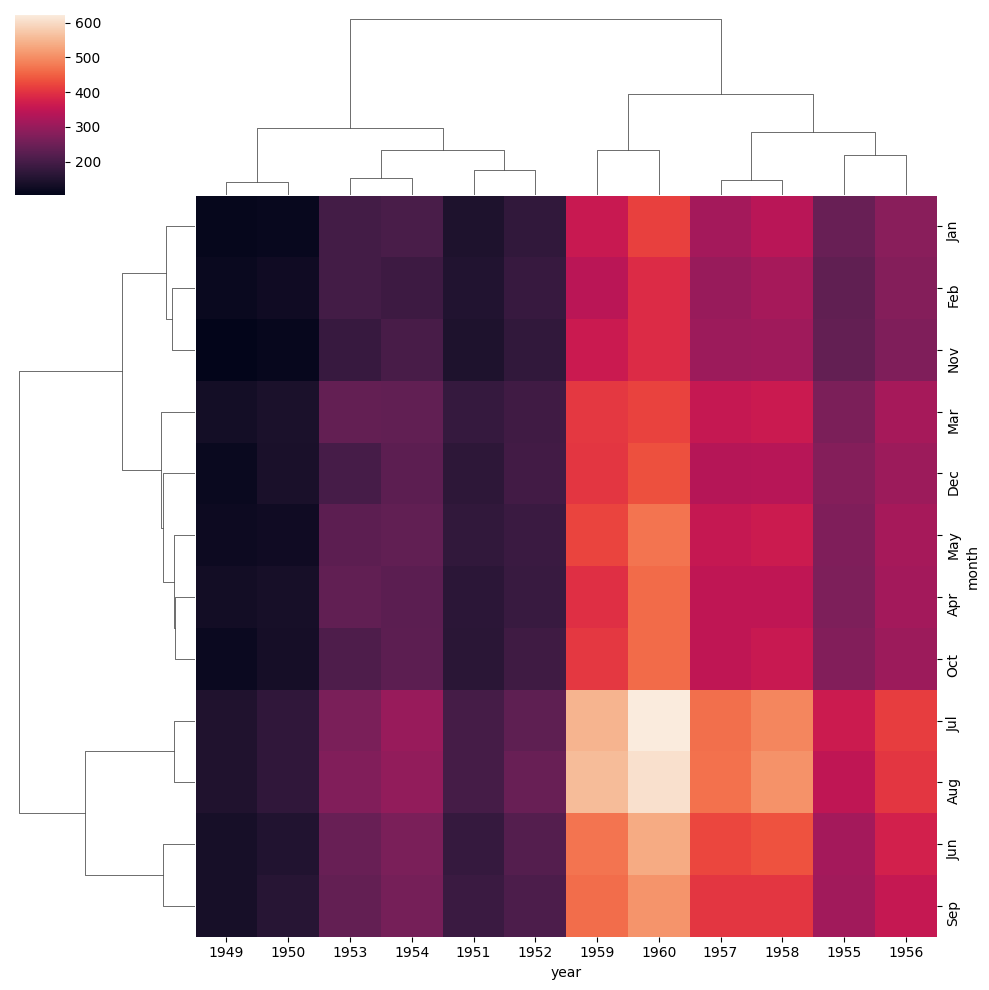

In [67]:
sns.clustermap(flights.pivot_table(values='passengers', index='month', columns='year'))